<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#X.-Functions" data-toc-modified-id="X.-Functions-1">X. Functions</a></span><ul class="toc-item"><li><span><a href="#X.1-missing_values_table()" data-toc-modified-id="X.1-missing_values_table()-1.1">X.1 missing_values_table()</a></span></li><li><span><a href="#X.2-drop_cols()" data-toc-modified-id="X.2-drop_cols()-1.2">X.2 drop_cols()</a></span></li><li><span><a href="#X.3-drop_null_row()" data-toc-modified-id="X.3-drop_null_row()-1.3">X.3 drop_null_row()</a></span></li><li><span><a href="#X.4-plot_var()" data-toc-modified-id="X.4-plot_var()-1.4">X.4 plot_var()</a></span></li></ul></li><li><span><a href="#1.-Data" data-toc-modified-id="1.-Data-2">1. Data</a></span></li><li><span><a href="#2.-Feature-Selection:-Phase-1" data-toc-modified-id="2.-Feature-Selection:-Phase-1-3">2. Feature Selection: Phase 1</a></span><ul class="toc-item"><li><span><a href="#2.1-Features-with-too-many-missing-value" data-toc-modified-id="2.1-Features-with-too-many-missing-value-3.1">2.1 Features with too many missing value</a></span></li><li><span><a href="#2.2-Removing-&quot;cheat&quot;-data" data-toc-modified-id="2.2-Removing-&quot;cheat&quot;-data-3.2">2.2 Removing "cheat" data</a></span></li><li><span><a href="#2.3-Unique-Rate-Check" data-toc-modified-id="2.3-Unique-Rate-Check-3.3">2.3 Unique Rate Check</a></span></li><li><span><a href="#2.4-Inspect-the-remaining-features-one-by-one" data-toc-modified-id="2.4-Inspect-the-remaining-features-one-by-one-3.4">2.4 Inspect the remaining features one by one</a></span><ul class="toc-item"><li><span><a href="#loan-amount" data-toc-modified-id="loan-amount-3.4.1">loan amount</a></span></li><li><span><a href="#Interest-rate" data-toc-modified-id="Interest-rate-3.4.2">Interest rate</a></span></li><li><span><a href="#term" data-toc-modified-id="term-3.4.3">term</a></span></li><li><span><a href="#installment" data-toc-modified-id="installment-3.4.4">installment</a></span></li><li><span><a href="#grade,-sub_grade" data-toc-modified-id="grade,-sub_grade-3.4.5">grade, sub_grade</a></span></li><li><span><a href="#emp_length" data-toc-modified-id="emp_length-3.4.6">emp_length</a></span></li><li><span><a href="#home_ownership" data-toc-modified-id="home_ownership-3.4.7">home_ownership</a></span></li><li><span><a href="#anaual-income" data-toc-modified-id="anaual-income-3.4.8">anaual income</a></span></li><li><span><a href="#verification-status" data-toc-modified-id="verification-status-3.4.9">verification status</a></span></li><li><span><a href="#purpose" data-toc-modified-id="purpose-3.4.10">purpose</a></span></li><li><span><a href="#title" data-toc-modified-id="title-3.4.11">title</a></span></li><li><span><a href="#addr_stat" data-toc-modified-id="addr_stat-3.4.12">addr_stat</a></span></li><li><span><a href="#dti" data-toc-modified-id="dti-3.4.13">dti</a></span></li><li><span><a href="#open_acc" data-toc-modified-id="open_acc-3.4.14">open_acc</a></span></li><li><span><a href="#fico_range_low,-fico_range_high" data-toc-modified-id="fico_range_low,-fico_range_high-3.4.15">fico_range_low, fico_range_high</a></span></li><li><span><a href="#pub_rec" data-toc-modified-id="pub_rec-3.4.16">pub_rec</a></span></li><li><span><a href="#pub_rec_bankruptcies" data-toc-modified-id="pub_rec_bankruptcies-3.4.17">pub_rec_bankruptcies</a></span></li><li><span><a href="#revol_bal" data-toc-modified-id="revol_bal-3.4.18">revol_bal</a></span></li><li><span><a href="#revol_util" data-toc-modified-id="revol_util-3.4.19">revol_util</a></span></li><li><span><a href="#initial_list_status" data-toc-modified-id="initial_list_status-3.4.20">initial_list_status</a></span></li><li><span><a href="#policy_code" data-toc-modified-id="policy_code-3.4.21">policy_code</a></span></li><li><span><a href="#application_type" data-toc-modified-id="application_type-3.4.22">application_type</a></span></li><li><span><a href="#mo_sin_old_il_acct" data-toc-modified-id="mo_sin_old_il_acct-3.4.23">mo_sin_old_il_acct</a></span></li><li><span><a href="#mo_sin_old_rev_tl_op" data-toc-modified-id="mo_sin_old_rev_tl_op-3.4.24">mo_sin_old_rev_tl_op</a></span></li><li><span><a href="#mort_acc" data-toc-modified-id="mort_acc-3.4.25">mort_acc</a></span></li></ul></li><li><span><a href="#Short-summary" data-toc-modified-id="Short-summary-3.5">Short summary</a></span></li></ul></li></ul></div>

In [ ]:
import pandas as pd 
import numpy as np

## X. Functions

### X.1 missing_values_table()

Check missing value rates for all columns and make it a table

In [2]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

### X.2 drop_cols()

Drop one or more columns using the column names of **df**

In [3]:
def drop_cols(cols):
    df.drop(labels=cols, axis=1, inplace=True)

### X.3 drop_null_row()

Drop missing values for one or more columns using the column names of df

In [4]:
def drop_null_row(cols):
    df.dropna(subset=cols, axis=0, inplace=True)

### X.4 plot_var()

Visualize a variable with/without faceting on the loan status.
  - col_name is the variable name in the dataframe
  - full_name is the full variable name
  - continuous is True for continuous variables


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'loan_status', height=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='loan_status', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

## 1. Data

Since we have subset the data with 2015-2018 only. We will just load the subset of data to improve the efficiency of cleaning. 

In [8]:
#df = pd.read_csv('./Data/15_18.csv', low_memory=False)
df = pd.read_pickle('../Data/16_18.pkl')

Make the *IssueData* the data type as datetime and extract the year and month. 

In [9]:
df["IssueDate"] = pd.to_datetime(df["IssueDate"])

Extract *year* and *month* from the *IssueDate*

In [10]:
df['issue_year'] = df['IssueDate'].dt.year
df['issue_month'] = df['IssueDate'].dt.month

In 2016, LendingClub issued the most of the loans and 2018 the least. 

In [12]:
df['issue_year'].value_counts(normalize=False, dropna=False)

2016    293095
2017    169300
2018     56311
Name: issue_year, dtype: int64

## 2. Feature Selection: Phase 1

The raw data has over 150 features, but not all of them are useful. 

Those features will be dropped directly.

- Features with more than 40% missing value.
- Features would not have been avaiable at the time of the loan application.

Then I will go through features one by one to decide whether to keep or to do feature engineering. 

- String to numerical
- Superfluous attributes
- highly corrlated predictors

### 2.1 Features with too many missing value

Call function **missing_values_table()**

In [13]:
missing_values_table(df)

Your selected dataframe has 154 columns.
There are 76 columns that have missing values.


,Missing Values,% of Total Values,type
member_id,518706,100.0,float64
next_pymnt_d,518706,100.0,object
desc,518688,100.0,object
orig_projected_additional_accrued_interest,516644,99.6,float64
hardship_dpd,515203,99.3,float64
...,...,...,...
last_credit_pull_d,12,0.0,object
avg_cur_bal,10,0.0,float64
zip_code,1,0.0,object
inq_last_6mths,1,0.0,float64


**From the table, we can see that some features have 100% missing rate and some of them have no missing value, I choose 40% as the cutoff.**

In [14]:
missing_frac = df.isnull().mean()
drop_list = sorted(missing_frac[missing_frac > 0.39].index)

In [15]:
len(drop_list)

44

In [16]:
print(drop_list)

['annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'settlement_amount', 'settlement_date', 'settlement_percentage', 'settlem

In [17]:
drop_cols(drop_list)

### 2.2 Removing "cheat" data

The goal of this project is to predict whether a loan will be paid off BEFORE making the decision to lend the loan. Therefore, I would like to remove the features that were unavailable before lending a loan.

We still have 96 features in the data, I check the variable description carefully and select those variables which only avaiable after loan issued.

In [18]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag', 'IssueDate', 'issue_year', 'issue_month'],
      dtype='object', length=110)

In [19]:
drop_list = ['acc_now_delinq', 'acc_open_past_24mths','avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim','earliest_cr_line']

In [20]:
drop_cols(drop_list)

In [21]:
missing_values_table(df)

Your selected dataframe has 51 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values,type
il_util,70150,13.5,float64
emp_title,36722,7.1,object
emp_length,35934,6.9,object
title,16523,3.2,object
mths_since_rcnt_il,13744,2.6,float64
mo_sin_old_il_acct,13696,2.6,float64
revol_util,413,0.1,float64
dti,372,0.1,float64
all_util,106,0.0,float64
open_acc_6m,54,0.0,float64


As we can see that there are 21 features with missing value and we have 51 features left in the data. **zip_code** has only 1 missing value and **dti** has 372. **dti** is one of the most important features in the analysis. So, I will just drop those missing values.

In [22]:
drop_null_row(['zip_code','dti', 'revol_util', 'inq_fi', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 
              'open_act_il', 'inq_last_12m','total_cu_tl', 'open_acc_6m'])

In [23]:
missing_values_table(df)

Your selected dataframe has 51 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values,type
il_util,69916,13.5,float64
emp_title,36317,7.0,object
emp_length,35531,6.9,object
title,16506,3.2,object
mths_since_rcnt_il,13650,2.6,float64
mo_sin_old_il_acct,13650,2.6,float64


### 2.3 Unique Rate Check

For unique rate, we should do it very carefully. Because sometimes both the high unique rate and the low unique rate make sense. We need to carefully check the definition. 

In [24]:
df.nunique()

id                      517867
loan_amnt                 1548
term                         2
int_rate                   241
installment              52700
grade                        7
sub_grade                   35
emp_title               134249
emp_length                  11
home_ownership               5
annual_inc               31470
verification_status          3
issue_d                     36
loan_status                  2
url                     517867
purpose                     13
title                       13
zip_code                   911
addr_state                  50
dti                       7050
fico_range_low              38
fico_range_high             38
open_acc                    77
pub_rec                     30
revol_bal                63021
revol_util                1180
total_acc                  131
initial_list_status          2
policy_code                  1
application_type             2
open_acc_6m                 19
open_act_il                 50
open_il_

In [25]:
drop_list = ['id','emp_title','url','zip_code']

In [26]:
drop_cols(drop_list)

### 2.4 Inspect the remaining features one by one

The tasks involved are:

- Visualization with count distributions, bar plot & kernel density estimate (KDE) plot with faceting on the loan status
- Drop useless features 
- Cleaning & Formatting (e.g., "emp_length")
- Transformation of features (e.g., log transformation of "annual_inc", average of "fico_score")
- Pick the most relevant features in the data (e.g., "sub_grade" vs "grade")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517867 entries, 421101 to 2260697
Data columns (total 47 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             517867 non-null  float64       
 1   term                  517867 non-null  object        
 2   int_rate              517867 non-null  float64       
 3   installment           517867 non-null  float64       
 4   grade                 517867 non-null  object        
 5   sub_grade             517867 non-null  object        
 6   emp_length            482336 non-null  object        
 7   home_ownership        517867 non-null  object        
 8   annual_inc            517867 non-null  float64       
 9   verification_status   517867 non-null  object        
 10  issue_d               517867 non-null  object        
 11  loan_status           517867 non-null  object        
 12  purpose               517867 non-null  object       

So far, we have 33 features left(4 features with some missing value)

#### loan amount

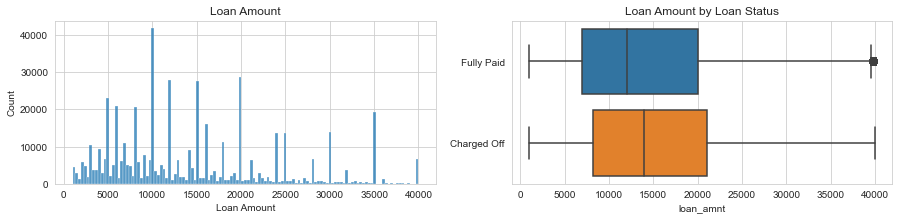

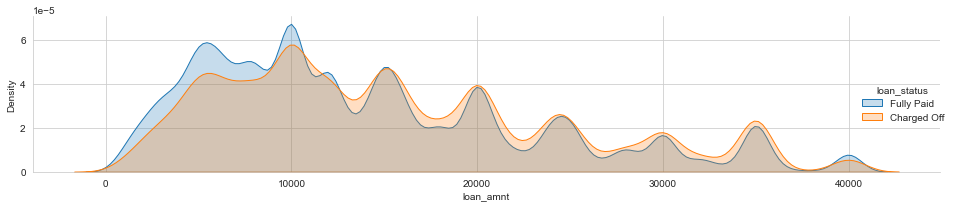

In [28]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

*Charged Off* group has higher interest rate compared to *Fully Paid* group. But there are some outliers there. 

#### Interest rate

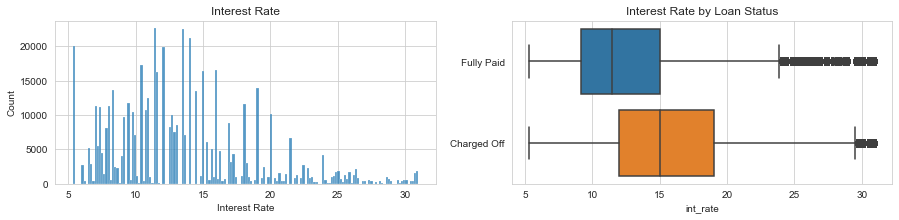

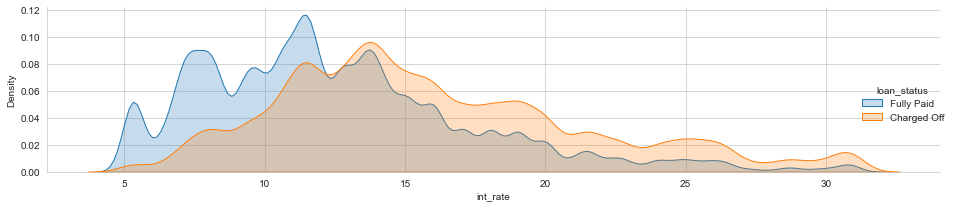

In [29]:
plot_var('int_rate', 'Interest Rate', continuous=True)

*Charged Off* group has higher interest rate compared to *Fully Paid* group. But there are some outliers there. 

#### term

In [30]:
df['term'].value_counts(dropna=False)

 36 months    401547
 60 months    116320
Name: term, dtype: int64

we extract the number of term only. 

In [31]:
df['term'] = df['term'].apply(lambda s: np.int8(s.split()[0]))

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


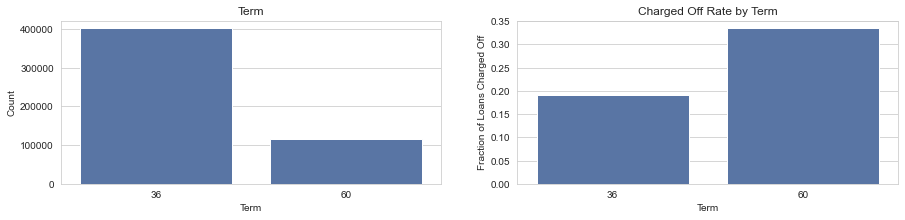

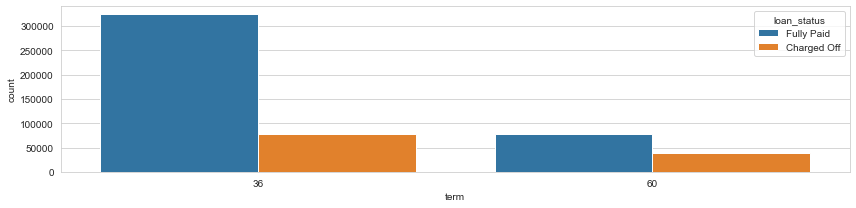

In [32]:
plot_var('term', 'Term', continuous=False)

#### installment

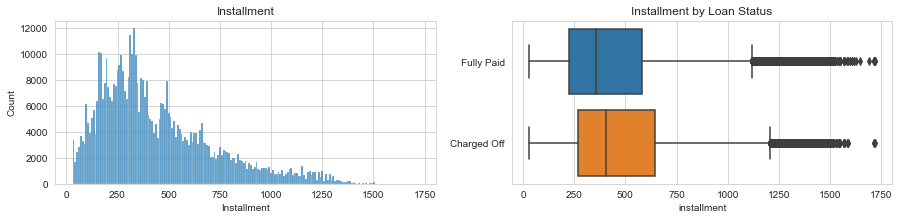

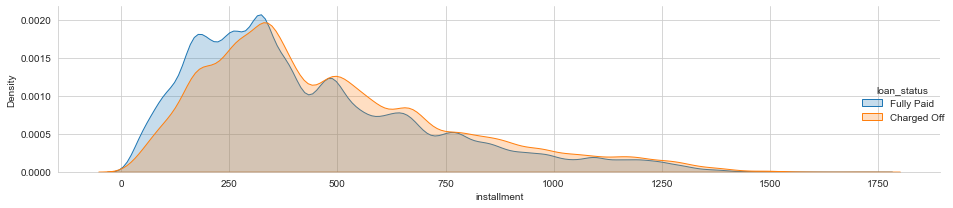

In [33]:
plot_var('installment', 'Installment', continuous=True)

#### grade, sub_grade

In [34]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [35]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


The "grade" is included in the "sub_grade" column, so it could be dropped.

In [36]:
drop_cols('grade')

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


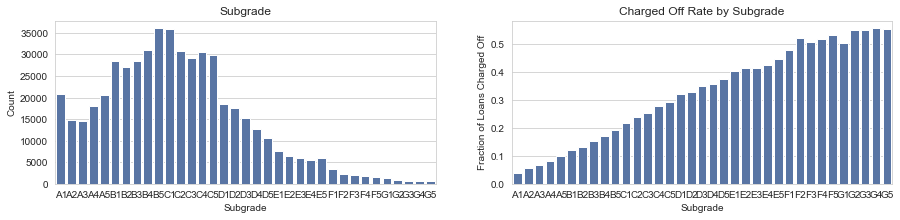

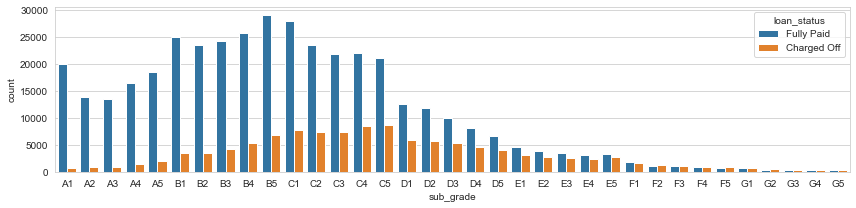

In [37]:
plot_var('sub_grade','Subgrade',continuous=False)

#### emp_length

"Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years." The actual data does not match this description:

In [38]:
df['emp_length'].value_counts(dropna=False).sort_index()

1 year        34967
10+ years    173535
2 years       47901
3 years       42070
4 years       31342
5 years       31834
6 years       22310
7 years       17755
8 years       19733
9 years       18844
< 1 year      42045
NaN           35531
Name: emp_length, dtype: int64

There are about 58k loans without the information on emp_length. Convert this feature to integers.

In [39]:
df['emp_length'].replace('10+ years', '10 years', inplace=True)
df['emp_length'].replace('< 1 year', '0 years', inplace=True)
df['emp_length'].value_counts(dropna=False).sort_index()
df.emp_length.map( lambda x: str(x).split()[0]).value_counts(dropna=True).sort_index()
df['emp_length'] = df.emp_length.map( lambda x: float(str(x).split()[0]))

In [40]:
df['emp_length'].sample(5)

2219236     3.0
553727     10.0
1662028    10.0
2209125     8.0
1015432    10.0
Name: emp_length, dtype: float64

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


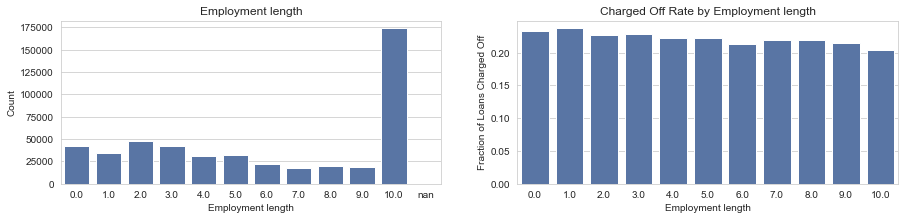

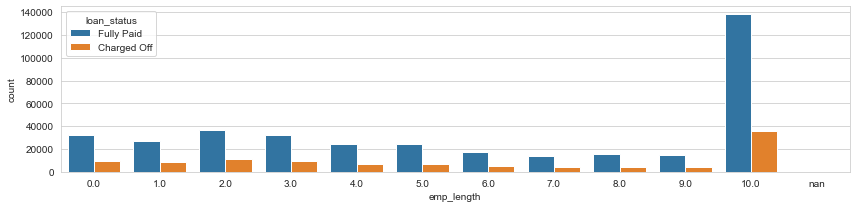

In [41]:
plot_var('emp_length', 'Employment length', continuous=False)

One third of the loans go to the people with longer than 10 years of employments. However, the fully paid rate seems not quite related to this feature. Again, this will be further examined in a statistical test at the end.

#### home_ownership

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [42]:
df['home_ownership'].value_counts()

MORTGAGE    255646
RENT        198630
OWN          63306
ANY            282
NONE             3
Name: home_ownership, dtype: int64

I decide to drop **ANY** and **None** since they are not so many.

In [43]:
df['home_ownership'] = df['home_ownership'].astype('str')

In [44]:
df = df[df['home_ownership'].str.contains('ANY|NONE')==False]

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


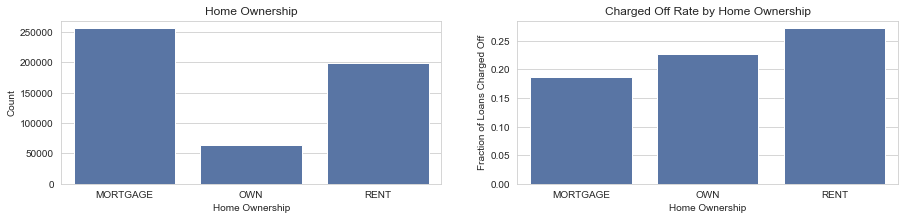

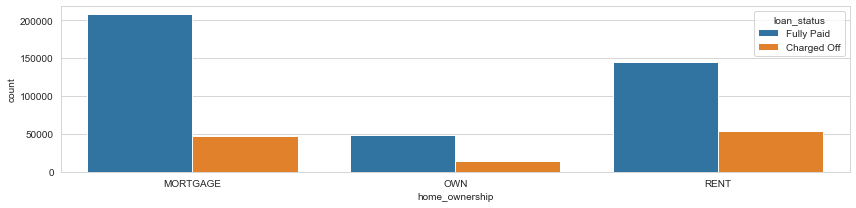

In [45]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appear to be small differences in charge-off rates by home ownership status.

#### anaual income

In [46]:
df['annual_inc'].describe()

count    5.175820e+05
mean     7.901537e+04
std      7.735130e+04
min      1.600000e+01
25%      4.800000e+04
50%      6.600000e+04
75%      9.500000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

Annual income ranges from 0 to 8M, with a median at 65k, which doubles the national median individual income in the US (40k for males and 25k for females). Due to the large range of variation, we log-transform the values.

In [47]:
df['annual_inc_log'] = df['annual_inc'].apply(lambda x:np.log10(x+1))

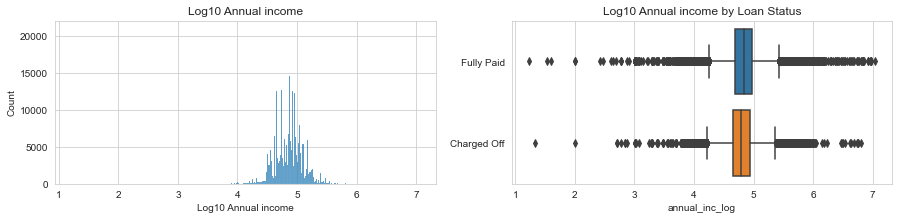

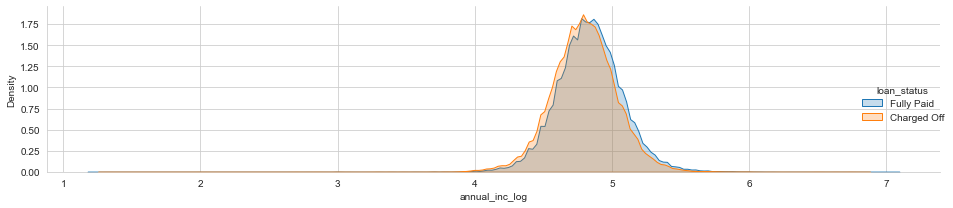

In [48]:
plot_var('annual_inc_log', 'Log10 Annual income', continuous=True)

In [49]:
df.groupby('loan_status')['annual_inc_log'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,116035.0,4.793097,0.237582,1.322219,4.653222,4.792399,4.939524,6.812913
Fully Paid,401547.0,4.835781,0.240334,1.230449,4.690205,4.832515,4.982276,7.041361


For both cases, there are quite a few outliers (in the lower end).

#### verification status

Indicates if income was verified by Lending Club, not verified, or if the income source was verified.

In [50]:
df['verification_status'].value_counts()

Source Verified    212444
Not Verified       161053
Verified           144085
Name: verification_status, dtype: int64

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


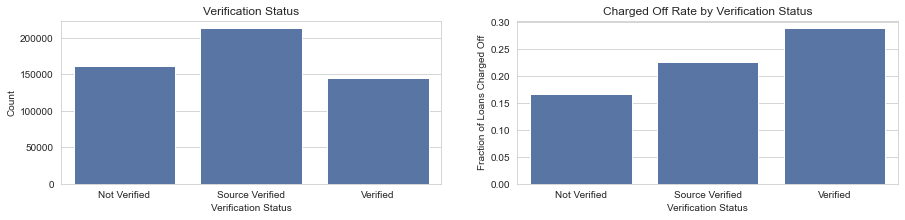

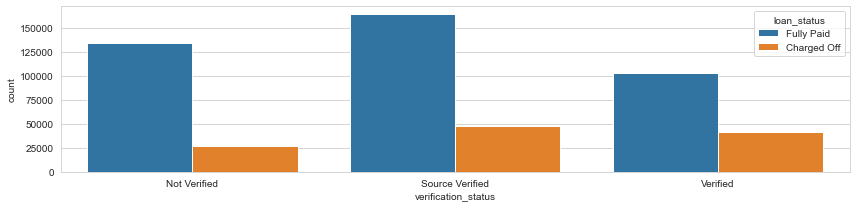

In [51]:
plot_var('verification_status', 'Verification Status', continuous=False)

Surprisingly, verified loans have higher chance of being charged-Off. I would guess the opposite way.

#### purpose

In [52]:
df['purpose'].value_counts()

debt_consolidation    292525
credit_card           104150
home_improvement       39102
other                  36917
major_purchase         13132
medical                 7364
car                     6090
small_business          5569
vacation                4410
moving                  4235
house                   3711
renewable_energy         374
wedding                    3
Name: purpose, dtype: int64

In [53]:
df = df[df['purpose'].str.contains('wedding|educational')==False]

In [54]:
df.groupby('purpose')['loan_status'].value_counts(normalize=True)[:,'Charged Off'].sort_values(ascending=False)

purpose
small_business        0.345843
renewable_energy      0.264706
moving                0.260921
medical               0.245111
debt_consolidation    0.236195
house                 0.229588
other                 0.228106
major_purchase        0.215276
vacation              0.213152
credit_card           0.196198
home_improvement      0.192573
car                   0.164532
Name: loan_status, dtype: float64

We see that, 34% of the loans for small_business are charged off

#### title

In [55]:
df['title'].describe()

count                 501073
unique                    13
top       Debt consolidation
freq                  282310
Name: title, dtype: object

too many unique values and overlaps with **purpose**

In [56]:
drop_cols('title')

#### addr_stat

addr_state: "The state provided by the borrower in the loan application."

In [57]:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True)[:,'Charged Off'].sort_values(ascending=False)

addr_state
MS    0.281338
AR    0.274089
LA    0.266258
AL    0.260109
OK    0.257203
NY    0.256855
NE    0.250394
MD    0.245669
FL    0.240762
NJ    0.240270
MO    0.237685
NM    0.233686
PA    0.233574
NV    0.232650
IN    0.230643
NC    0.229983
MI    0.229882
KY    0.229673
TX    0.228639
AK    0.227395
SD    0.226504
CA    0.225628
TN    0.222482
MA    0.222316
VA    0.220222
OH    0.219266
MN    0.218593
HI    0.217039
AZ    0.213610
DE    0.212895
IL    0.210126
WI    0.209541
GA    0.207120
ND    0.203390
WY    0.193517
CT    0.190936
KS    0.190128
RI    0.189969
ID    0.189254
MT    0.181691
SC    0.173021
NH    0.168800
UT    0.168481
WA    0.167692
CO    0.166205
WV    0.156863
VT    0.152299
DC    0.150649
OR    0.149901
ME    0.137909
Name: loan_status, dtype: float64

AR has the highest fraction of Charged Off (0.27), whereas ME has the lowest fraction at 0.14.

#### dti

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income

In [58]:
df['dti'].describe()

count    517579.000000
mean         18.781007
std          14.527991
min          -1.000000
25%          11.830000
50%          17.830000
75%          24.580000
max         999.000000
Name: dti, dtype: float64

The values of -1 or 999 are probably outliers. Let's look at its histogram 

Text(0.5, 1.0, 'DTI by loan status')

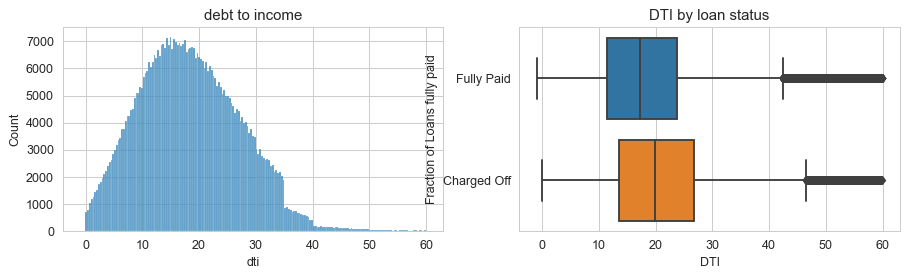

In [59]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
sns.histplot(df.loc[df['dti'].notnull() & (df['dti'] < 60), 'dti'], kde=False, ax=ax1)
ax1.set_xlabel('dti')
ax1.set_ylabel('Count')
ax1.set_title('debt to income')
sns.boxplot(x=df.loc[df['dti'].notnull() & (df['dti'] < 60), 'dti'], y='loan_status', data=df, ax=ax2)
ax2.set_xlabel('DTI')
ax2.set_ylabel('Fraction of Loans fully paid')
ax2.set_title('Fully paid rate by debt to income')
ax2.set_title('DTI by loan status')

In [60]:
(df['dti'] > 40).sum() / (df['dti']).sum()

0.0006886367374023368

In [61]:
(df['dti'] > 40).sum()

6694

Very few (0.04%) outliers with dti > 40. From the figure it seems that the Charged Off loans have higher DTI. Let's check.

In [62]:
df.groupby('loan_status')['dti'].median()

loan_status
Charged Off    19.98
Fully Paid     17.25
Name: dti, dtype: float64

It's clear that borrowers who have higher DTI are more likely to be charged off

#### open_acc

The number of open credit lines in the borrower's credit filem

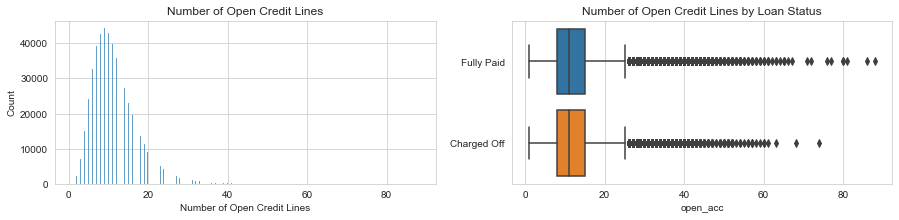

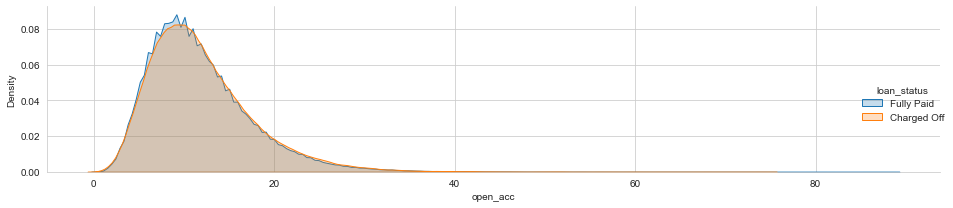

In [63]:
plot_var('open_acc', 'Number of Open Credit Lines', continuous=True)

There seems no significant difference in number of credit lines between fully paid loans and charged-off loans.

#### fico_range_low, fico_range_high

In [64]:
df[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


These two are highly correlated, therefore we only need to keep one. We create a new feature, "fico_score" which is the mean value of the "fico_range_low" and "fico_range_high"

In [65]:
df['fico_score'] = (df['fico_range_low'] + df['fico_range_high'])/2. 

In [66]:
drop_cols(['fico_range_high','fico_range_low'])

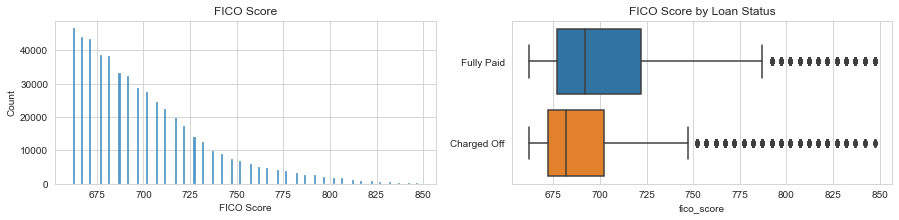

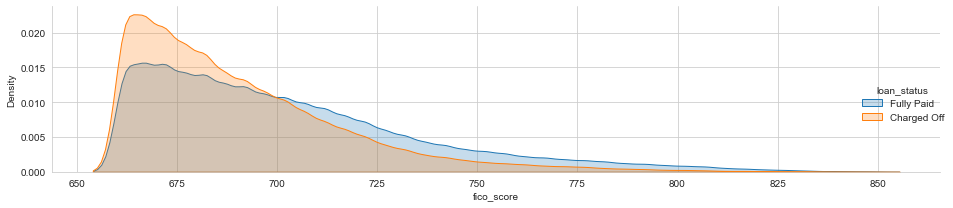

In [67]:
plot_var('fico_score', 'FICO Score', continuous=True)

There is noticeable difference in FICO scores between fully paid and charged-off loans.

Explore more about the three most important features 

In [68]:
df[['fico_score','int_rate','term']].corr()

,fico_score,int_rate,term
fico_score,1.000000,-0.376115,0.005963
int_rate,-0.376115,1.000000,0.390028
term,0.005963,0.390028,1.000000


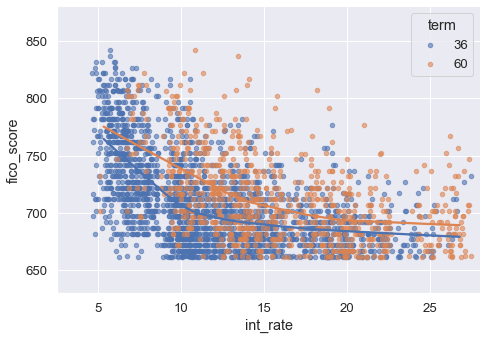

In [69]:
plot_df = df.query('fico_score > 650 & int_rate <28')[:3000]

sns.set(font_scale=1.2, rc={"lines.linewidth": 1.5}) 

g = sns.lmplot(x="int_rate", y="fico_score", x_jitter= .7,  y_jitter= .1, data=plot_df, hue='term',lowess=True, height=5, aspect=1.4, facet_kws=dict(legend_out=False), scatter_kws={ 's':20, 'alpha':.6})

g.set(xlim=(2.5, 28),ylim=(630, 880),alpha = .5)

#g.savefig('1.png',transparent=True)

short-term loans have higher "fico_score" especially at lower "int_rate".

#### pub_rec

Number of derogatory public records.

In [70]:
df['pub_rec'].value_counts().sort_values(ascending=False)

0.0     417817
1.0      83597
2.0      10589
3.0       3242
4.0       1190
5.0        565
6.0        274
7.0        126
8.0         56
9.0         41
10.0        20
11.0        17
12.0        13
13.0         6
14.0         4
15.0         3
24.0         2
28.0         2
21.0         2
19.0         2
20.0         2
46.0         1
22.0         1
37.0         1
47.0         1
16.0         1
25.0         1
61.0         1
18.0         1
17.0         1
Name: pub_rec, dtype: int64

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


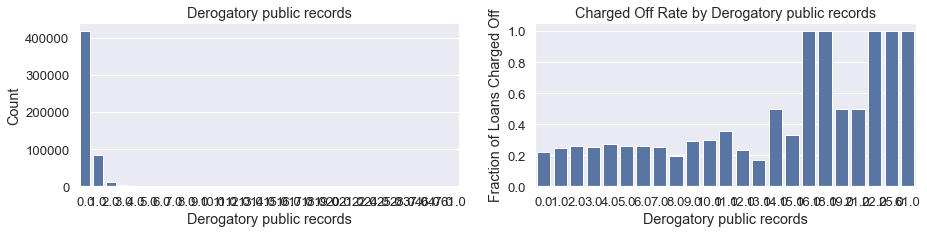

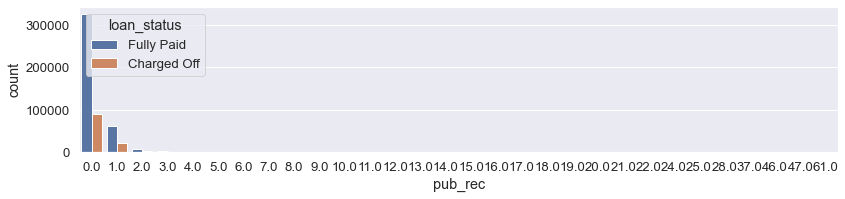

In [71]:
plot_var('pub_rec','Derogatory public records', continuous=False)

"pub_rec" > 11 have significant of Charged-Off rate. However, it's affected by low-counts. If we look at the overall statistics, the mean difference in "pub_Rec" is just 0.04 for fully paid/charged Off

In [72]:
df.pub_rec = df.pub_rec.map(lambda x: 1 if x >0.0 else x)

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


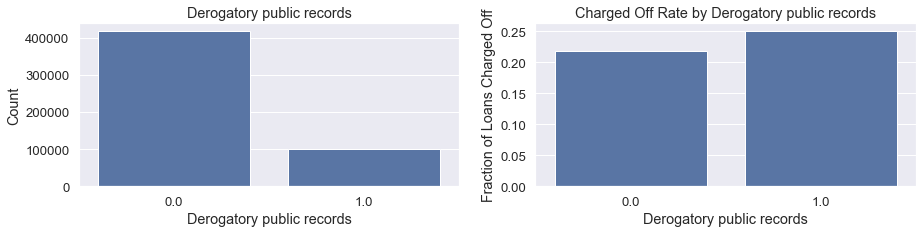

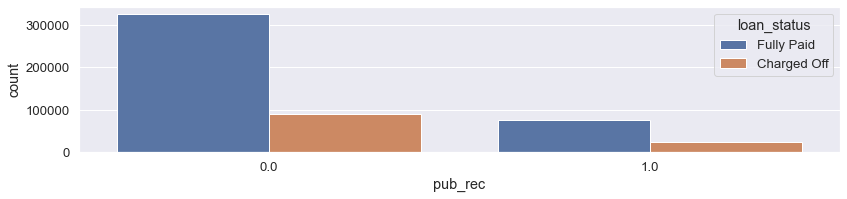

In [73]:
plot_var('pub_rec','Derogatory public records', continuous=False)

After grouping, it is clear that: pub_rec are mostly 0 & 1; pub_rec with 0 and higher have higher chance of being charged off than pub_rec of 0.

#### pub_rec_bankruptcies

Number of public record bankruptcies.

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


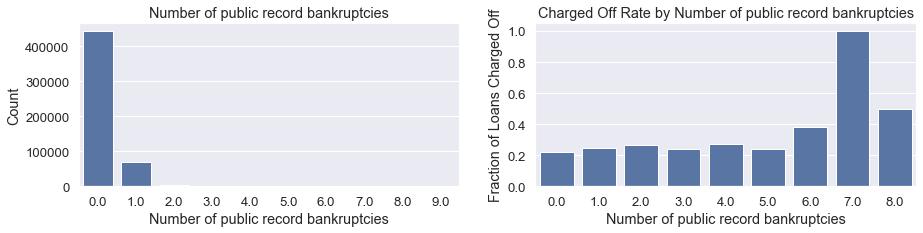

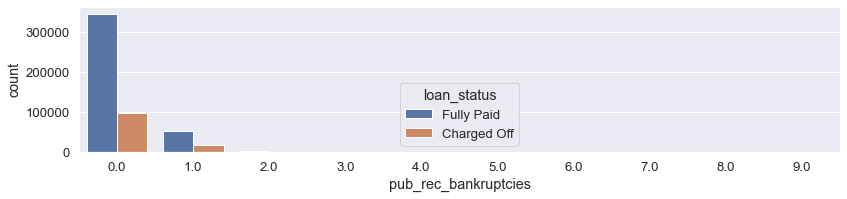

In [74]:
plot_var('pub_rec_bankruptcies', 'Number of public record bankruptcies', continuous=False)

In [75]:
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.map(lambda x: 1 if x > 0 else x)

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


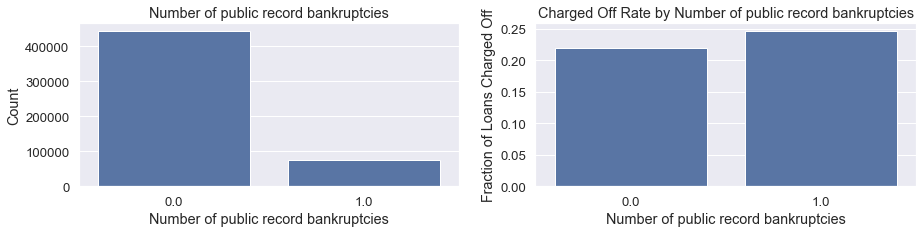

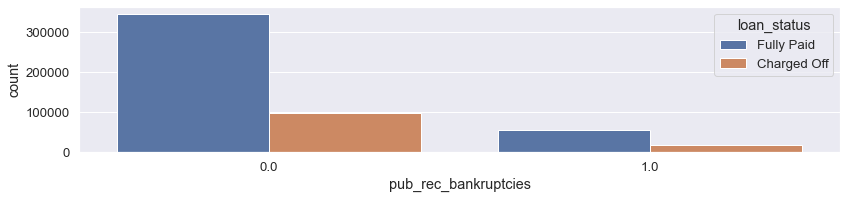

In [76]:
plot_var('pub_rec_bankruptcies', 'Number of public record bankruptcies', continuous=False)

In [77]:
df[['pub_rec','pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.838034
pub_rec_bankruptcies,0.838034,1.000000


"pub_rec" and "pub_rec_bankruptcies" are highly correlated. could only feed one of them into the modeling.

#### revol_bal

Total credit revolving balance.

In [78]:
df['revol_bal'].describe()

count    5.175790e+05
mean     1.582987e+04
std      2.303554e+04
min      0.000000e+00
25%      5.408000e+03
50%      1.041000e+04
75%      1.879000e+04
max      1.696796e+06
Name: revol_bal, dtype: float64

In [79]:
df['revol_bal_log'] = df['revol_bal'].apply(lambda x:np.log10(x+1))

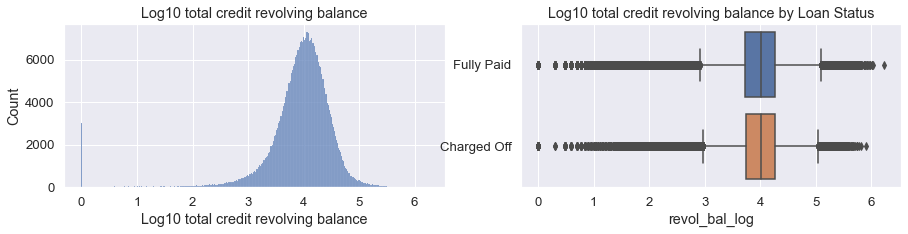

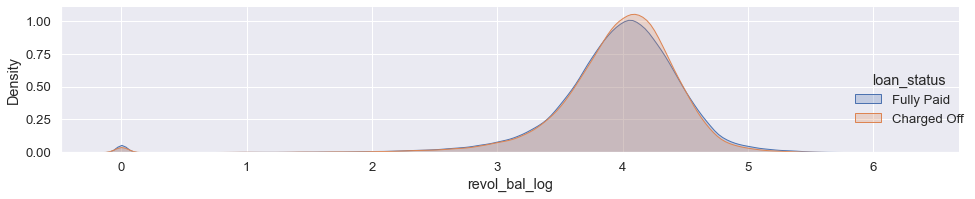

In [80]:
plot_var('revol_bal_log', 'Log10 total credit revolving balance', continuous=True)

#### revol_util

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit

In [81]:
df['revol_util'].describe()

count    517579.000000
mean         47.188623
std          24.855688
min           0.000000
25%          28.000000
50%          46.400000
75%          65.900000
max         172.000000
Name: revol_util, dtype: float64

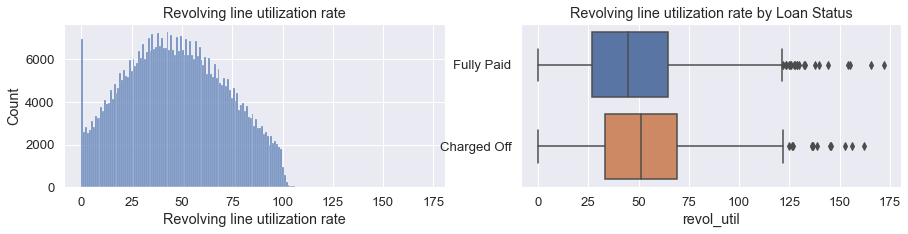

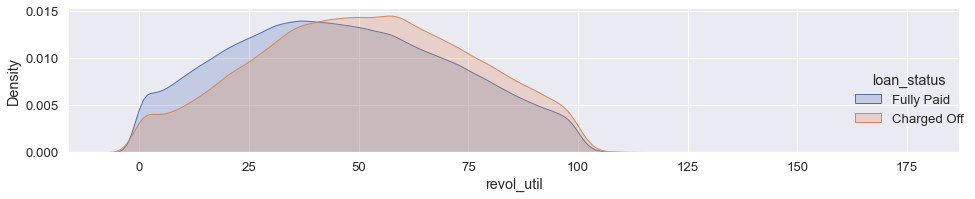

In [82]:
plot_var('revol_util', 'Revolving line utilization rate', continuous=True)

In [83]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,116034.0,51.139549,24.252469,0.0,33.3,51.1,69.3,162.0
Fully Paid,401545.0,46.046929,24.910894,0.0,26.6,44.9,64.7,172.0


Charged Off loans tend to have higher revol_util.

#### initial_list_status

The initial listing status of the loan. Possible values are – W, F (whole vs. fractional)

In [84]:
df['initial_list_status'].value_counts()

w    396293
f    121286
Name: initial_list_status, dtype: int64

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


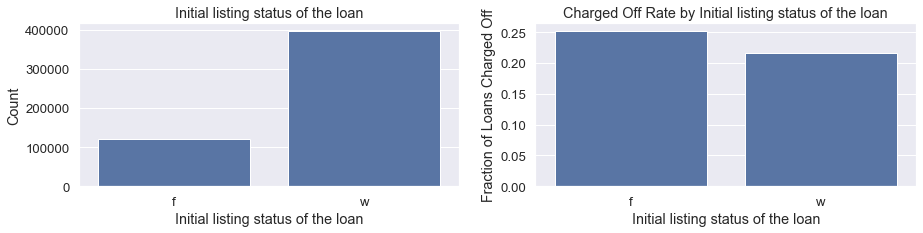

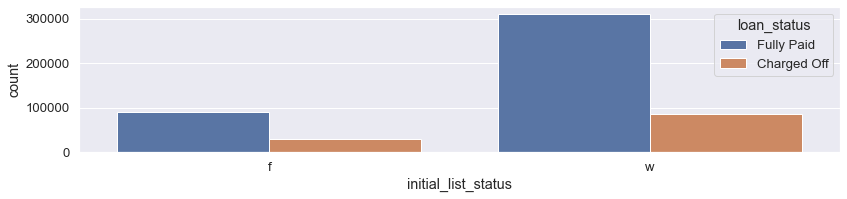

In [85]:
plot_var('initial_list_status','Initial listing status of the loan', continuous=False)

#### policy_code

In [86]:
df['policy_code'].value_counts()

1.0    517579
Name: policy_code, dtype: int64

In [87]:
drop_cols('policy_code')

#### application_type

In [88]:
df['application_type'].value_counts()

Individual    492598
Joint App      24981
Name: application_type, dtype: int64

In [89]:
drop_cols('application_type')

#### mo_sin_old_il_acct

In [90]:
df['mo_sin_old_il_acct'].describe()

count    503940.000000
mean        124.469258
std          53.015974
min           0.000000
25%          96.000000
50%         129.000000
75%         152.000000
max         999.000000
Name: mo_sin_old_il_acct, dtype: float64

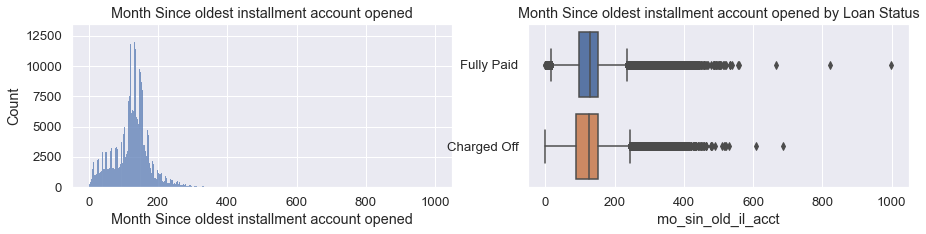

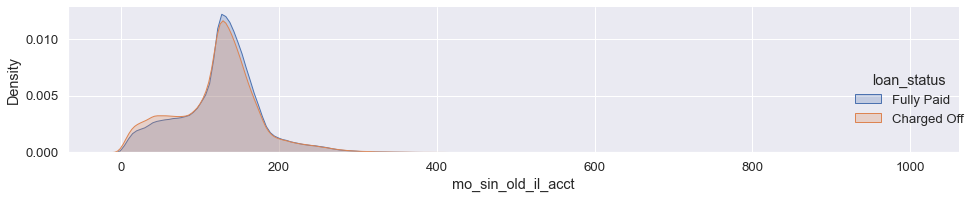

In [91]:
plot_var('mo_sin_old_il_acct', 'Month Since oldest installment account opened', continuous=True)

#### mo_sin_old_rev_tl_op

In [92]:
df['mo_sin_old_rev_tl_op'].describe()

count    517579.000000
mean        178.578387
std          96.368200
min           2.000000
25%         116.000000
50%         161.000000
75%         228.000000
max         852.000000
Name: mo_sin_old_rev_tl_op, dtype: float64

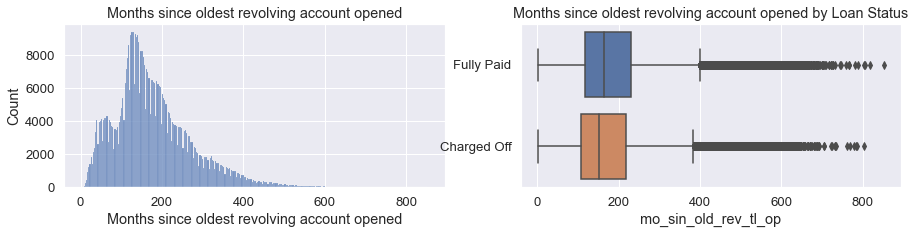

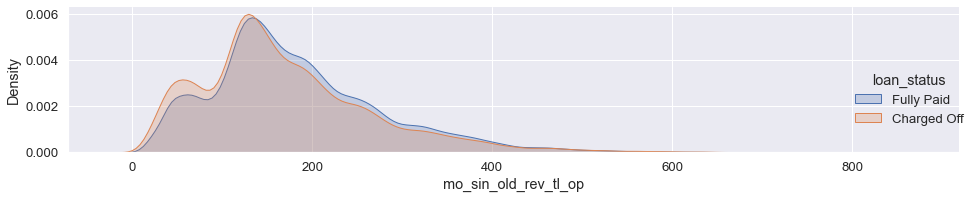

In [93]:
plot_var('mo_sin_old_rev_tl_op', 'Months since oldest revolving account opened', continuous=True)

#### mort_acc

Number of mortgage accounts

In [94]:
df['mort_acc'].describe()

count    517579.000000
mean          1.551705
std           1.849307
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          51.000000
Name: mort_acc, dtype: float64

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


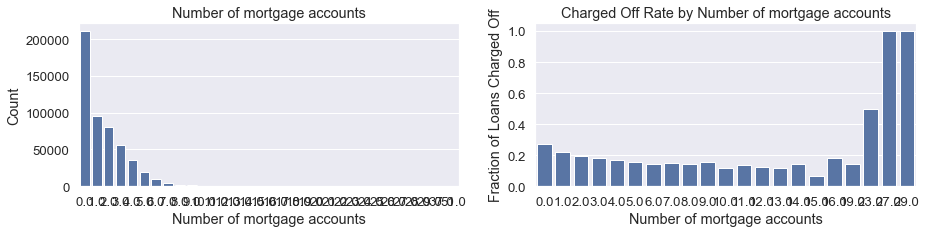

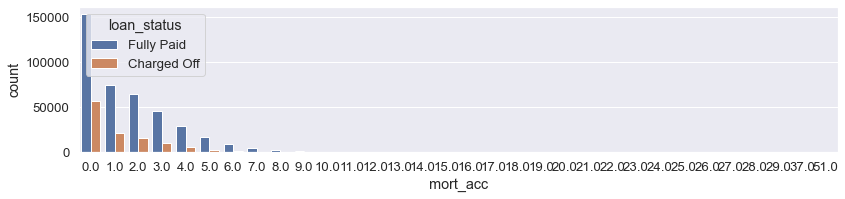

In [95]:
plot_var('mort_acc', 'Number of mortgage accounts', continuous=False)

In [96]:
df.mort_acc = df.mort_acc.map(lambda x: 5.0 if x > 5.0 else x)

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


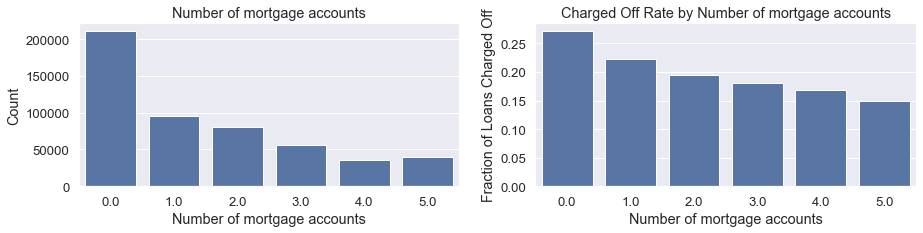

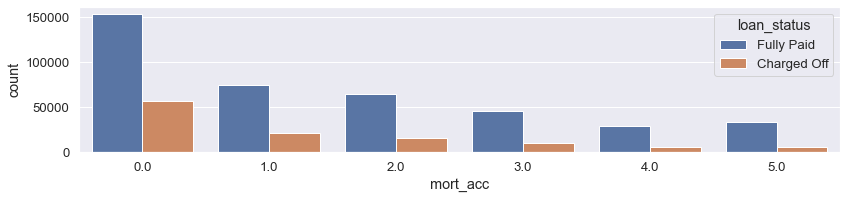

In [97]:
plot_var('mort_acc', 'Number of mortgage accounts', continuous=False)

The more the number of mortgage accounts, the lower fraction of loans charged off.


### Short summary

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517579 entries, 421101 to 2260697
Data columns (total 44 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             517579 non-null  float64       
 1   term                  517579 non-null  int8          
 2   int_rate              517579 non-null  float64       
 3   installment           517579 non-null  float64       
 4   sub_grade             517579 non-null  object        
 5   emp_length            482068 non-null  float64       
 6   home_ownership        517579 non-null  object        
 7   annual_inc            517579 non-null  float64       
 8   verification_status   517579 non-null  object        
 9   issue_d               517579 non-null  object        
 10  loan_status           517579 non-null  object        
 11  purpose               517579 non-null  object        
 12  addr_state            517579 non-null  object       

**Remove three date time related variables, just keep one and some other not useful variables.**

In [101]:
drop_cols(['issue_d', 'issue_year', 'issue_month','emp_length', 'annual_inc_log', 'revol_bal_log'])

In [103]:
df.to_pickle('../Data/part1_clean_data_16_18.pkl')  # where to save it, usually as a .pkl